Dans ce fichier, l'objectif est de faire l'histogramme des erreurs de reconstruction et l'UMAP de l'espace latent pour le sillon central droit des sujets des bases de données UKB et HCP après avoir implémenter un beta-VAE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Chargement des fichiers 

Embeddings_UKB= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Embeddings.csv")
Embeddings_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/CCD/Embeddings.csv")

Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/hcp/Reconstruction_error.csv")
Reconstruc_error_CCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/CCD/Reconstruction_error.csv")

In [3]:
Participants_CCD=pd.read_csv("/neurospin/dico/data/human/CCD/participants.tsv", sep="\t")

In [4]:
CCD_Controls= Participants_CCD[Participants_CCD["Diagnosis"]=="control"]
CCD_Subjects= Participants_CCD[Participants_CCD["Diagnosis"]=="CCD"]

In [5]:
#We rename the first colomn 

Reconstruc_error_CCD  = Reconstruc_error_CCD.rename(columns={Reconstruc_error_CCD.columns[0]: "Index"})
Embeddings_CCD  = Embeddings_CCD.rename(columns={Embeddings_CCD.columns[0]: "Index"})

In [6]:
#From CCD, we separate CCD_Subjects and CCD_Controls

Reconstruc_error_CCD_Subjects = Reconstruc_error_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Reconstruc_error_CCD_Controls = Reconstruc_error_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

Embeddings_CCD_Subjects = Embeddings_CCD.merge(CCD_Subjects[["Index"]], on="Index", how="inner")
Embeddings_CCD_Controls = Embeddings_CCD.merge(CCD_Controls[["Index"]], on="Index", how="inner")

$\textbf{ Histogramme des erreurs de reconstruction}$

In [7]:
Reconstruc_error_UKB=Reconstruc_error_UKB.iloc[:,1]
Reconstruc_error_HCP=Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_CCD_Subjects=Reconstruc_error_CCD_Subjects.iloc[:,1]
Reconstruc_error_CCD_Controls=Reconstruc_error_CCD_Controls.iloc[:,1]

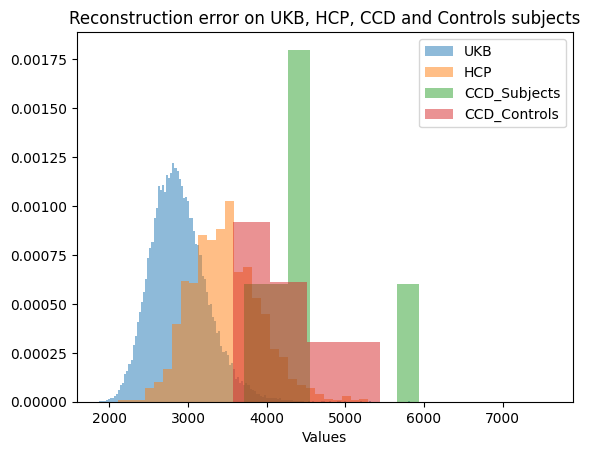

In [8]:
plt.hist(Reconstruc_error_UKB, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(Reconstruc_error_HCP, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_CCD_Subjects, bins="auto", alpha=0.5, label="CCD_Subjects", density=True)
plt.hist(Reconstruc_error_CCD_Controls, bins="auto", alpha=0.5, label="CCD_Controls", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [9]:
X1 = Embeddings_UKB.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_CCD_Controls.iloc[:,1:76]
X4= Embeddings_CCD_Subjects.iloc[:,1:76]

In [10]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)

/neurospin/dico/fred/Runs/01_betaVAE/Program/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


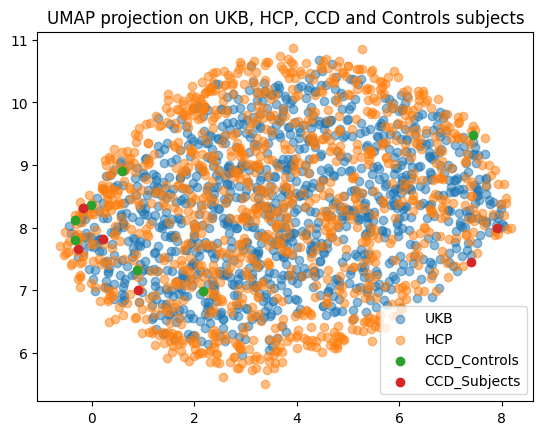

In [11]:
plt.scatter(X1_umap[0:len(X2),0], X1_umap[0:len(X2),1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="CCD_Controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="CCD_Subjects")
plt.title("UMAP projection on UKB, HCP, CCD and Controls subjects")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [12]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': Reconstruc_error_UKB
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_CCD_Controls=pd.DataFrame({
    'database': 'CCD_Controls',
    'Reconstruc_error': Reconstruc_error_CCD_Controls
})

Reconstruc_error_CCD_Subjects=pd.DataFrame({
    'database': 'CCD_Subjects',
    'Reconstruc_error': Reconstruc_error_CCD_Subjects
})


In [13]:
Reconstruc_error_UKB

,database,Reconstruc_error
0,UKB,2717.726562
1,UKB,2951.913086
2,UKB,3319.848145
3,UKB,2960.276855
4,UKB,3075.081299
...,...,...
42428,UKB,2892.883789
42429,UKB,3244.373535
42430,UKB,2642.636963
42431,UKB,2866.343750


In [14]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_CCD_Controls,Reconstruc_error_CCD_Subjects ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. CCD_Controls: Mann-Whitney-Wilcoxon test two-sided, P_val:1.218e-04 U_stat=9.300e+02
CCD_Controls vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:6.282e-01 U_stat=1.700e+01
HCP vs. CCD_Subjects: Mann-Whitney-Wilcoxon test two-sided, P_val:3.020e-05 U_stat=5.150e+02


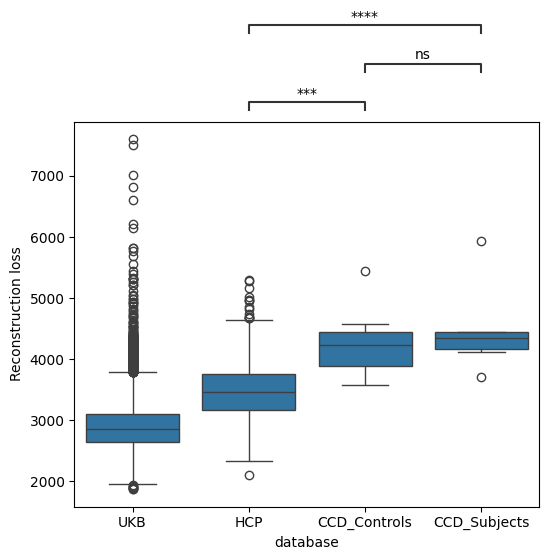

In [15]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "CCD_Controls"), ("HCP", "CCD_Subjects"), ("CCD_Controls", "CCD_Subjects")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()